# Project: Investigate a Dataset (Investigating FBI Gun Data)

## Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project aims to investigate guns data from National Instant Criminal Background Check System (NICS), a source of FBI. 
Intended objectives are to find out:

>Trend of Firearm checks on yearly basis

>State wise Comparison of Gun Permits

>Correlation among Gun Permits and Education, Gender, Population


In [209]:
# importing essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [210]:
df_gun=pd.read_excel("gun.xlsx") #I already renamed dataset files to short names for convenience
df_cen=pd.read_csv("census.csv") #cen is abbreviation of Census

In [211]:
#Get an idea of data
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [212]:
#Census data set

df_cen.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [213]:
# Getting size of data frame
print(f"Size of Guns Data set is: { df_gun.shape}\n")

#getting information like data types, and checking the columns having less entries as compared to others
df_gun.info()


#similarly:
print(f"Size of Census Data set is: { df_cen.shape}\n")
df_cen.info()

Size of Guns Data set is: (12485, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            

In [214]:
#checking null values, I checked them in separate cells and then combined in single cell 
#other wise it would become too lengthy
df_gun.isnull().sum()
df_cen.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [215]:
#checking duplicates 
print(f"duplicates in gun data are: {df_gun.duplicated().sum()}")
print(f"duplicates in census data are: {df_cen.duplicated().sum()}")

duplicates in gun data are: 0
duplicates in census data are: 3


### Data Cleaning
>**Gun Data:**

In [216]:
#sseparating month and year data in two columns which was written together
df_gun['year'] = df_gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
df_gun['year'].head()

df_gun['month'] = df_gun['month'].apply(lambda x: x.split("-")[1]).astype(int)
df_gun['month'].head()

0    9
1    9
2    9
3    9
4    9
Name: month, dtype: int32

In [217]:
#selecting specific columns to use others are redundant
df_gun = df_gun [['year', 'month', 'state', 'permit', 'handgun', 'long_gun', 'totals']]
df_gun.head()

,year,month,state,permit,handgun,long_gun,totals
0,2017,9,Alabama,16717.0,5734.0,6320.0,32019
1,2017,9,Alaska,209.0,2320.0,2930.0,6303
2,2017,9,Arizona,5069.0,11063.0,7946.0,28394
3,2017,9,Arkansas,2935.0,4347.0,6063.0,17747
4,2017,9,California,57839.0,37165.0,24581.0,123506


In [218]:
#filling null values
print(df_gun.mean())
df_gun.fillna(df_gun.mean())
df_gun.mean()
#checked mean before and after to look for any anomaly

year         2007.792952
month           6.484581
permit       6413.629404
handgun      5940.881107
long_gun     7810.847585
totals      21595.725911
dtype: float64


year         2007.792952
month           6.484581
permit       6413.629404
handgun      5940.881107
long_gun     7810.847585
totals      21595.725911
dtype: float64

>**Census Data:**

In [219]:
# deleting column as well as extra rows
df_cen = df_cen.drop(df_cen.columns[1], axis=1)
df_cen = df_cen.drop(df_cen.index[65:])
df_cen.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [220]:
df_cen.duplicated().sum()
#no duplicates anymore

0

In [221]:
#creating a list of states:
states = list(df_cen.columns[1:].values)
print (states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [222]:
#some of the row labels titled percebntage don't actually have data in percentage like row 2
# so we need to convert all of them to percentage

#multiply all decimals with 100
def func(value):
    new_value = value
    if value <1.0:
        new_value = value *100.0
    return new_value

for i in states:
    df_cen[i].replace(regex=True, inplace=True, to_replace = r'[^\d.-]', value = r'')
    df_cen[i] = pd.to_numeric(df_cen[i], downcast='float', errors='ignore') 
    df_cen[i] = df_cen[i].apply(func)
    
df_cen.head()    

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,20612440.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1.831102e+06,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",4780131.0,710249.0,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1.853011e+06,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",1.7,4.5,8.4,2.5,5.4,10.2,10.0,6.0,9.6,...,6.3,4.8,10.8,10.4,-20.0,5.1,8.4,-1.200000e+02,1.6,3.9
3,"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741.0,8001024.0,6724540.0,1.852994e+06,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,...,7.1,6.1,7.2,8.3,4.9,6.1,6.2,5.500000e+00,5.8,6.5


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Trend of Firearm checks on yearly basis)

In [223]:
#grouped guns on yearly basis
guns_yearly = df_gun.groupby('year')['totals'].sum()

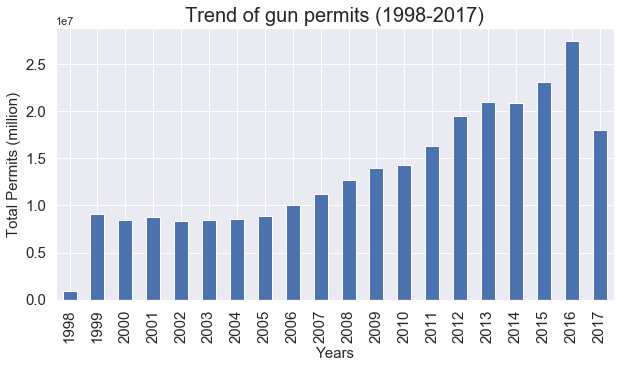

In [224]:
#just plotting it.
sns.set()
guns_yearly.plot(x='Year', kind = 'bar', figsize=(10,5), legend=False, fontsize=15)
plt.ylabel('Total Permits (million)', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.title('Trend of gun permits (1998-2017)', fontsize = 20);

>**Inference:**
The graph shows that an increasing trend of gun permits is followed after 2004, with 2016 being the highest among all. 
Also we can't say that there is a drop in 2017 as it happened actually because we don't have full data of 2017, similar is the case with 1998. In short gun permits are increasing each year

### Research Question 2  (state-wise comparison of firearms)

Now we should look at states data, if some states have higher tendency to get firearms than others.

In [229]:
gun_states = df_gun.groupby('state')['totals'].sum()
#gun_states.idxmax()
gun_states.head()

state
Alabama        6706079
Alaska         1137643
Arizona        4425714
Arkansas       3752633
California    19014063
Name: totals, dtype: int64

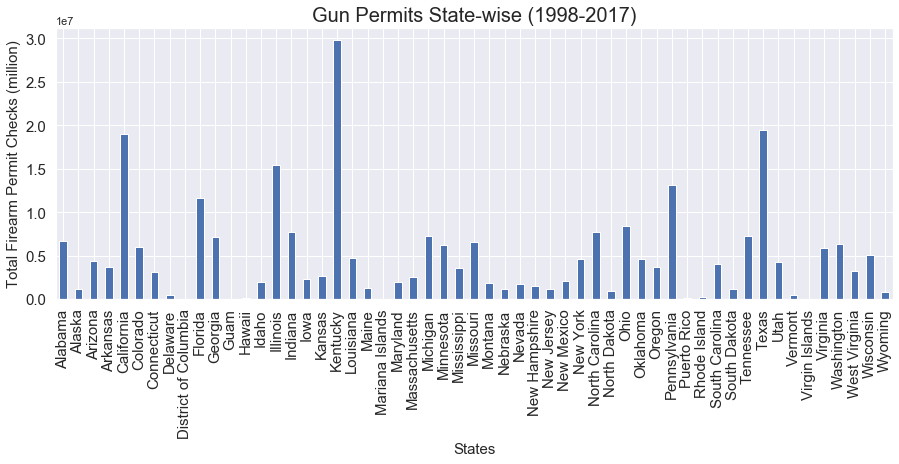

In [232]:
gun_states.plot(x='state', kind = 'bar', figsize=(15,5), legend=False, fontsize=15)
plt.xlabel('States', fontsize = 15)
plt.ylabel('Total Firearm Permit Checks (million)', fontsize = 15)
plt.title('Gun Permits State-wise (1998-2017)', fontsize = 20);

>**Inference:**
Kentucky has uniquely high value among all followed by California and Texas. Mariana Islands on the other hand is the lowest in guns permits. Excluding Kentucky and 4 others followed by it, we can say all of the remaining are somewhat closer to each other.

### Research Question 3  (Correlation among Gun Permits and Education, Gender, Population)

In [233]:
df_cen.set_index('Fact', inplace = True)
df_cen_switched = df_cen.T.reset_index()

df_cen_switched.rename(columns ={'index':'state'},inplace = True)
df_cen_switched.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.600000,23.700001,16.100000,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.400002,50645.328125,1.0
1,Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.200001,26.400000,10.400000,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.200000,570640.937500,2.0
2,Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.500000,25.500000,16.900000,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.299999,113594.078125,4.0
3,Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.600000,24.400000,16.299999,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.000000,52035.480469,5.0
4,California,39250016.0,37254520.0,5.4,37253956.0,6.3,6.8,23.200001,25.000000,13.600000,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.100006,155779.218750,6.0


In [240]:
df_merge = pd.DataFrame(gun_states).merge(df_cen_switched, on='state', how='inner')
df_merge.head()

,state,totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,6706079,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.600000,23.700001,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.400002,50645.328125,1.0
1,Alaska,1137643,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.200001,26.400000,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.200000,570640.937500,2.0
2,Arizona,4425714,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.500000,25.500000,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.299999,113594.078125,4.0
3,Arkansas,3752633,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.600000,24.400000,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.000000,52035.480469,5.0
4,California,19014063,39250016.0,37254520.0,5.4,37253956.0,6.3,6.8,23.200001,25.000000,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.100006,155779.218750,6.0


In [241]:
df_merge.corr()

,totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
totals,1.000000,0.649697,0.649583,0.005831,0.649580,0.056013,0.064058,0.109797,0.136158,-0.169444,...,0.616555,0.614314,0.608787,0.546540,0.646606,0.650293,0.611154,-0.073982,0.087509,-0.101534
"Population estimates, July 1, 2016, (V2016)",0.649697,1.000000,0.999079,0.063772,0.999078,-0.000040,0.006257,0.028916,0.091196,-0.185680,...,0.993865,0.992564,0.989937,0.954343,0.979373,0.985603,0.992466,0.162460,0.138429,-0.097769
"Population estimates base, April 1, 2010, (V2016)",0.649583,0.999079,1.000000,0.060007,1.000000,-0.011667,-0.006688,0.018806,0.081579,-0.180228,...,0.992858,0.992857,0.987899,0.947094,0.983653,0.981592,0.991785,0.172003,0.126120,-0.100028
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",0.005831,0.063772,0.060007,1.000000,0.059999,0.181682,0.234331,0.219377,0.277980,-0.234335,...,0.065681,0.062033,0.068124,0.061441,0.066532,0.081335,0.063923,-0.009454,0.080753,-0.218555
"Population, Census, April 1, 2010",0.649580,0.999078,1.000000,0.059999,1.000000,-0.011658,-0.006681,0.018814,0.081587,-0.180248,...,0.992854,0.992855,0.987893,0.947088,0.983651,0.981584,0.991782,0.172001,0.126126,-0.100014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Veteran-owned firms, 2012",0.650293,0.985603,0.981592,0.081335,0.981584,-0.024587,-0.018334,0.004386,0.062687,-0.155322,...,0.982512,0.980985,0.981545,0.941242,0.970953,1.000000,0.978878,0.160562,0.123188,-0.094424
"Nonveteran-owned firms, 2012",0.611154,0.992466,0.991785,0.063923,0.991782,-0.015141,-0.012596,0.003216,0.063658,-0.165694,...,0.999816,0.998510,0.998283,0.970346,0.976694,0.978878,1.000000,0.180175,0.133214,-0.125790
"Population per square mile, 2010",-0.073982,0.162460,0.172003,-0.009454,0.172001,-0.434285,-0.420443,-0.395973,-0.334883,0.111397,...,0.177226,0.199661,0.163683,0.141527,0.199733,0.160562,0.180175,1.000000,-0.346546,-0.048328
"Land area in square miles, 2010",0.087509,0.138429,0.126120,0.080753,0.126126,0.476106,0.456903,0.424421,0.435184,-0.548865,...,0.133118,0.121403,0.138893,0.190558,0.077379,0.123188,0.133214,-0.346546,1.000000,-0.187749


>**1st Correlation**

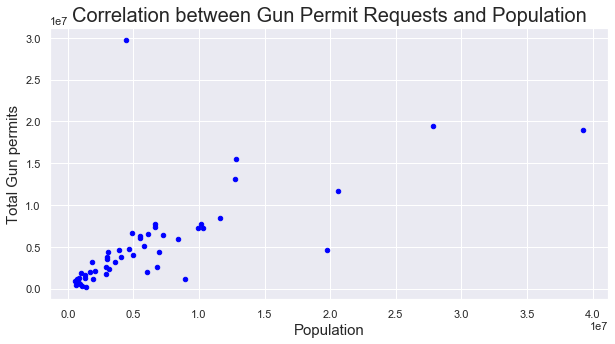

In [263]:
#Visualizing the correlation:
df_merge.plot.scatter(x='Population estimates, July 1, 2016,  (V2016)', y='totals', figsize=(10,5), c='blue' );
plt.ylabel('Total Gun permits', fontsize = 15)
plt.xlabel('Population', fontsize = 15)
plt.title('Correlation between Gun Permit Requests and Population', fontsize = 20);

**Interpretation:**
We can see a positive correlation beteen Population and gun permits having a value of 0.649697

>**2nd Correlation:**

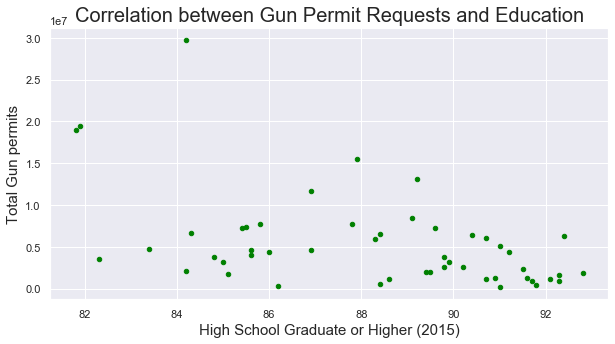

In [262]:
df_merge.plot.scatter(x='High school graduate or higher, percent of persons age 25 years+, 2011-2015', y='totals', figsize=(10,5), c='green' );
plt.ylabel('Total Gun permits', fontsize = 15)
plt.xlabel('High School Graduate or Higher (2015)', fontsize = 15)
plt.title('Correlation between Gun Permit Requests and Education', fontsize = 20);

In [254]:
df_merge['totals'].corr(df_merge['High school graduate or higher, percent of persons age 25 years+, 2011-2015'])

-0.47595857905196404

**Interpretation:** 
The correlation is negative, thouugh it's a very weak correlation, we expected that more educated people would result in lesser guns but we can't say it from the data neither we can say the opposite as the correlation is not strong enough.

>**3rd Correlation:**

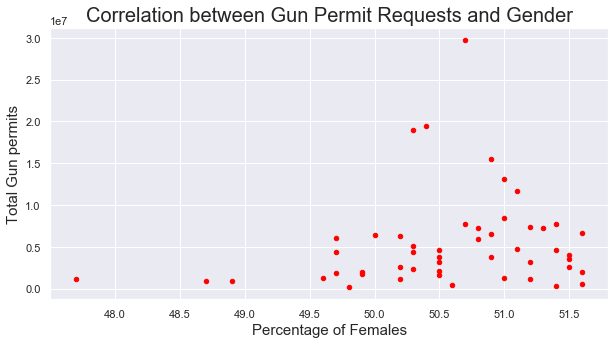

In [261]:
df_merge.plot.scatter(x='Female persons, percent,  July 1, 2016,  (V2016)', y='totals', figsize=(10,5), c='red' );
plt.ylabel('Total Gun permits', fontsize = 15)
plt.xlabel('Percentage of Females', fontsize = 15)
plt.title('Correlation between Gun Permit Requests and Gender', fontsize = 20);

In [258]:
print(f"Interpretation:\ncorrelation is weak in this case also having a value of only {df_merge['totals'].corr(df_merge['Female persons, percent,  July 1, 2016,  (V2016)'])}")

Interpretation:
correlation is weak in this case also having a value of only 0.1691617240119041


<a id='conclusions'></a>
## Conclusions
>There is an annually increasing trend in firearm checks, very high for 2016

>In state wise comparison kentucky is the highest for fire arm permit checks followed by california and texas

>There wasn't a strong correlation between firearms checks and educationn, gender or population